In [37]:
#Imports

import numpy as np
import sympy as sp
from sympy import init_printing
from sympy import *
from sympy import Matrix, symbols, solve_linear_system
from sympy.interactive import printing
from sympy.printing.latex import LatexPrinter, print_latex
from sympy import Eq
printing.init_printing(use_latex=True)

In [38]:
#Data

E=float(input("E=")) #GPa (190)
a=float(input("a=")) #m (2)
b=float(input("b=")) #m (1.3)
c=float(input("c=")) #m (5)
d=float(input("d=")) #mm (50)
F_1=float(input("F_1=")) #kN (170)

#Change to SI

E=E*10**9
d=d/1000
F_1=F_1*1000

In [39]:
#Rudak hossza

print("A rúdak hosszai:")

L_1=c
print("\nL_1=",L_1,"m")

L_2=np.sqrt(a**2+(b/2)**2)
print("L_2=",L_2,"m")

L_3=np.sqrt((a-c)**2+(b/2)**2)
print("L_3=",L_3,"m")

L_4=b
print("L_4=",L_4,"m")

L_5=np.sqrt(a**2+(b/2)**2)
print("L_5=",L_5,"m")

L_6=np.sqrt((a-c)**2+(b/2)**2)
print("L_6=",L_6,"m")

L_7=c
print("L_7=",L_7,"m")

#Szogek

print("\nRúdak szöghelyzetei:")

α_1=np.arctan(0/c)
print("\nα_1=",np.rad2deg(α_1))

α_2=np.arctan(-b/2/a)
print("α_2=",np.rad2deg(α_2))

α_3=np.arctan(-b/2/-(c-a))
print("α_3=",np.rad2deg(α_3))

α_4=3/2*np.pi
print("α_4=",np.rad2deg(α_4))

α_5=np.arctan(-b/2/-a)
print("α_5=",np.rad2deg(α_5))

α_6=np.arctan(-b/2/(c-a))
print("α_6=",np.rad2deg(α_6))

α_7=np.arctan(0/c)
print("α_7=",np.rad2deg(α_7))

A rúdak hosszai:

L_1= 5.0 m
L_2= 2.102974084481309 m
L_3= 3.0696090956341653 m
L_4= 1.3 m
L_5= 2.102974084481309 m
L_6= 3.0696090956341653 m
L_7= 5.0 m

Rúdak szöghelyzetei:

α_1= 0.0
α_2= -18.00416160591338
α_3= 12.225122675735753
α_4= 270.0
α_5= 18.00416160591338
α_6= -12.225122675735753
α_7= 0.0



A_cso= 0.0013548118318605987 m^2

K_ 1 =


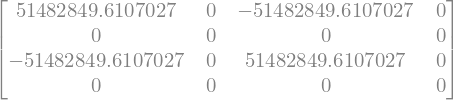


K_ 2 =


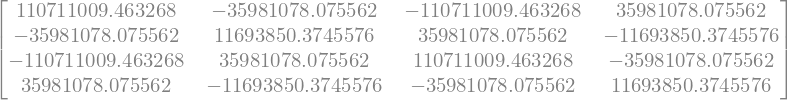


K_ 3 =


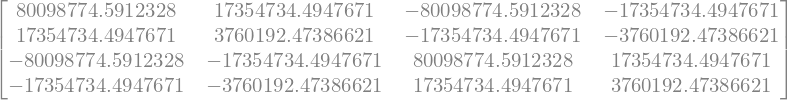


K_ 4 =


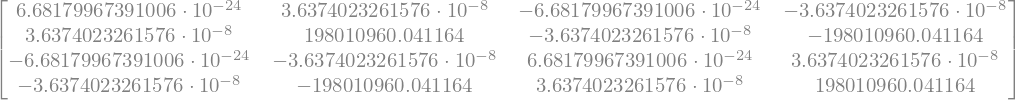


K_ 5 =


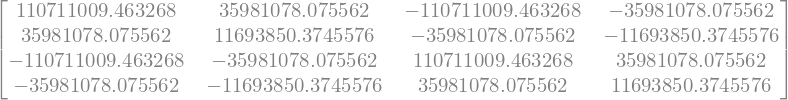


K_ 6 =


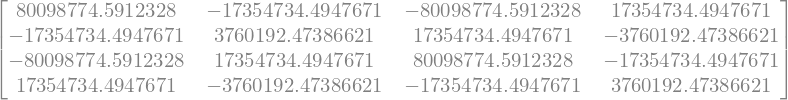


K_ 7 =


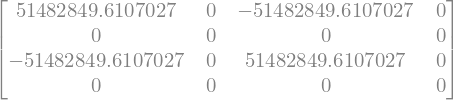

In [40]:
A=(1.3*d)**2*np.pi/4-d**2*np.pi/4
print("\nA_cso=",A,"m^2")

def K_matrix(L,α):
    K=A*E/L*sp.Matrix([[np.cos(α)**2,np.cos(α)*np.sin(α), -np.cos(α)**2, -np.cos(α)*np.sin(α)],
    [np.cos(α)*np.sin(α),np.sin(α)**2,-np.cos(α)*np.sin(α),-np.sin(α)**2],
    [-np.cos(α)**2,-np.cos(α)*np.sin(α), np.cos(α)**2, np.cos(α)*np.sin(α)],
    [-np.cos(α)*np.sin(α),-np.sin(α)**2,np.cos(α)*np.sin(α),np.sin(α)**2]])
    return K

#Printing

n=7
i=0
L_array=[L_1,L_2,L_3,L_4,L_5,L_6,L_7]
α_array=[α_1,α_2,α_3,α_4,α_5,α_6,α_7]
K_array=[0,0,0,0,0,0,0]
for i in range(n):
    K_array[i]=K_matrix(L_array[i],α_array[i])
    print("\nK_",i+1,"=")
    display(K_array[i])
    i=i+1

K_glob=


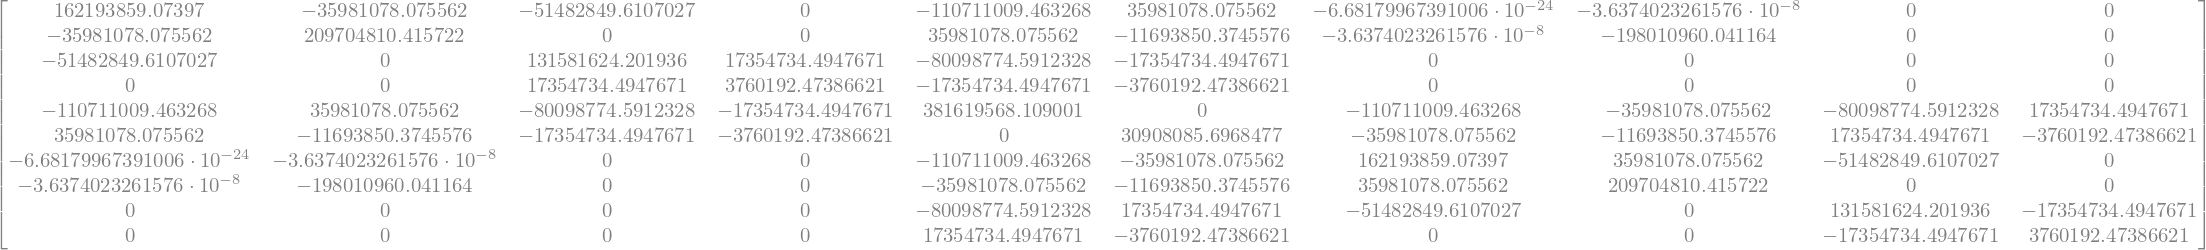

In [41]:
#Globális merevségi mátrix

K_g11=K_matrix(L_1,α_1)[0]+K_matrix(L_2,α_2)[0]+K_matrix(L_4,α_4)[0]
K_g12=K_matrix(L_1,α_1)[1]+K_matrix(L_2,α_2)[1]+K_matrix(L_4,α_4)[1]
K_g13=K_matrix(L_1,α_1)[2]
K_g14=K_matrix(L_1,α_1)[3]
K_g15=K_matrix(L_2,α_2)[2]
K_g16=K_matrix(L_2,α_2)[3]
K_g17=K_matrix(L_4,α_4)[2]
K_g18=K_matrix(L_4,α_4)[3]
K_g19=0
K_g110=0

K_g21=K_matrix(L_1,α_1)[4]+K_matrix(L_2,α_2)[4]+K_matrix(L_4,α_4)[4]
K_g22=K_matrix(L_1,α_1)[5]+K_matrix(L_2,α_2)[5]+K_matrix(L_4,α_4)[5]
K_g23=K_matrix(L_1,α_1)[6]
K_g24=K_matrix(L_1,α_1)[7]
K_g25=K_matrix(L_2,α_2)[6]
K_g26=K_matrix(L_2,α_2)[7]
K_g27=K_matrix(L_4,α_4)[6]
K_g28=K_matrix(L_4,α_4)[7]
K_g29=0
K_g210=0

K_g31=K_matrix(L_1,α_1)[8]
K_g32=K_matrix(L_1,α_1)[9]
K_g33=K_matrix(L_1,α_1)[10]+K_matrix(L_3,α_3)[0]
K_g34=K_matrix(L_1,α_1)[11]+K_matrix(L_3,α_3)[1]
K_g35=K_matrix(L_3,α_3)[2]
K_g36=K_matrix(L_3,α_3)[3]
K_g37=0
K_g38=0
K_g39=0
K_g310=0

K_g41=K_matrix(L_1,α_1)[12]
K_g42=K_matrix(L_1,α_1)[13]
K_g43=K_matrix(L_1,α_1)[14]+K_matrix(L_3,α_3)[4]
K_g44=K_matrix(L_1,α_1)[15]+K_matrix(L_3,α_3)[5]
K_g45=K_matrix(L_3,α_3)[6]
K_g46=K_matrix(L_3,α_3)[7]
K_g47=0
K_g48=0
K_g49=0
K_g410=0

K_g51=K_matrix(L_2,α_2)[8]
K_g52=K_matrix(L_2,α_2)[9]
K_g53=K_matrix(L_3,α_3)[8]
K_g54=K_matrix(L_3,α_3)[9]
K_g55=K_matrix(L_2,α_2)[10]+K_matrix(L_3,α_3)[10]+K_matrix(L_5,α_5)[0]+K_matrix(L_6,α_6)[0]
K_g56=K_matrix(L_2,α_2)[11]+K_matrix(L_3,α_3)[11]+K_matrix(L_5,α_5)[1]+K_matrix(L_6,α_6)[1]
K_g57=K_matrix(L_5,α_5)[2]
K_g58=K_matrix(L_5,α_5)[3]
K_g59=K_matrix(L_6,α_6)[2]
K_g510=K_matrix(L_6,α_6)[3]

K_g61=K_matrix(L_2,α_2)[12]
K_g62=K_matrix(L_2,α_2)[13]
K_g63=K_matrix(L_3,α_3)[12]
K_g64=K_matrix(L_3,α_3)[13]
K_g65=K_matrix(L_2,α_2)[14]+K_matrix(L_3,α_3)[14]+K_matrix(L_5,α_5)[4]+K_matrix(L_6,α_6)[4]
K_g66=K_matrix(L_2,α_2)[15]+K_matrix(L_3,α_3)[15]+K_matrix(L_5,α_5)[5]+K_matrix(L_6,α_6)[5]
K_g67=K_matrix(L_5,α_5)[6]
K_g68=K_matrix(L_5,α_5)[7]
K_g69=K_matrix(L_6,α_6)[6]
K_g610=K_matrix(L_6,α_6)[7]

K_g71=K_matrix(L_4,α_4)[8]
K_g72=K_matrix(L_4,α_4)[9]
K_g73=0
K_g74=0
K_g75=K_matrix(L_5,α_5)[8]
K_g76=K_matrix(L_5,α_5)[9]
K_g77=K_matrix(L_4,α_4)[10]+K_matrix(L_5,α_5)[10]+K_matrix(L_7,α_7)[0]
K_g78=K_matrix(L_4,α_4)[11]+K_matrix(L_5,α_5)[11]+K_matrix(L_7,α_7)[1]
K_g79=K_matrix(L_7,α_7)[2]
K_g710=K_matrix(L_7,α_7)[3]

K_g81=K_matrix(L_4,α_4)[12]
K_g82=K_matrix(L_4,α_4)[13]
K_g83=0
K_g84=0
K_g85=K_matrix(L_5,α_5)[12]
K_g86=K_matrix(L_5,α_5)[13]
K_g87=K_matrix(L_4,α_4)[14]+K_matrix(L_5,α_5)[14]+K_matrix(L_7,α_7)[4]
K_g88=K_matrix(L_4,α_4)[15]+K_matrix(L_5,α_5)[15]+K_matrix(L_7,α_7)[5]
K_g89=K_matrix(L_7,α_7)[6]
K_g810=K_matrix(L_7,α_7)[7]

K_g91=0
K_g92=0
K_g93=0
K_g94=0
K_g95=K_matrix(L_6,α_6)[8]
K_g96=K_matrix(L_6,α_6)[9]
K_g97=K_matrix(L_7,α_7)[8]
K_g98=K_matrix(L_7,α_7)[9]
K_g99=K_matrix(L_6,α_6)[10]+K_matrix(L_7,α_7)[10]
K_g910=K_matrix(L_6,α_6)[11]+K_matrix(L_7,α_7)[11]

K_g101=0
K_g102=0
K_g103=0
K_g104=0
K_g105=K_matrix(L_6,α_6)[12]
K_g106=K_matrix(L_6,α_6)[13]
K_g107=K_matrix(L_7,α_7)[12]
K_g108=K_matrix(L_7,α_7)[13]
K_g109=K_matrix(L_6,α_6)[14]+K_matrix(L_7,α_7)[14]
K_g1010=K_matrix(L_6,α_6)[15]+K_matrix(L_7,α_7)[15]

K=sp.Matrix([[K_g11,K_g12,K_g13,K_g14,K_g15,K_g16,K_g17,K_g18,K_g19,K_g110],
[K_g21,K_g22,K_g23,K_g24,K_g25,K_g26,K_g27,K_g28,K_g29,K_g210],
[K_g31,K_g32,K_g33,K_g34,K_g35,K_g36,K_g37,K_g38,K_g39,K_g310],
[K_g41,K_g42,K_g43,K_g44,K_g45,K_g46,K_g47,K_g48,K_g49,K_g410],
[K_g51,K_g52,K_g53,K_g54,K_g55,K_g56,K_g57,K_g58,K_g59,K_g510],
[K_g61,K_g62,K_g63,K_g64,K_g65,K_g66,K_g67,K_g68,K_g69,K_g610],
[K_g71,K_g72,K_g73,K_g74,K_g75,K_g76,K_g77,K_g78,K_g79,K_g710],
[K_g81,K_g82,K_g83,K_g84,K_g85,K_g86,K_g87,K_g88,K_g89,K_g810],
[K_g91,K_g92,K_g93,K_g94,K_g95,K_g96,K_g97,K_g98,K_g99,K_g910],
[K_g101,K_g102,K_g103,K_g104,K_g105,K_g106,K_g107,K_g108,K_g109,K_g1010]])

print("K_glob=")
display(K)

U=


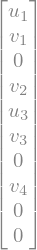

F=


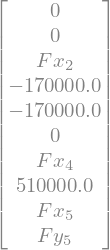

In [42]:
#Globális elmozdulás vektor

#Symbols

u_1,u_2,u_3,u_4,u_5,v_1,v_2,v_3,v_4,v_5=sp.symbols("u_1,u_2,u_3,u_4,u_5,v_1,v_2,v_3,v_4,v_5")

#PF

u_2=u_4=u_5=v_5=0

U=sp.Matrix([[u_1],[v_1],[u_2],[v_2],[u_3],[v_3],[u_4],[v_4],[u_5],[v_5]])

print("U=")
display(U)

#Globális terhelésvektor

#Symbols

Fx_1,Fy_1,Fx_2,Fy_2,Fx_3,Fy_3,Fx_4,Fy_4,Fx_5,Fy_5=sp.symbols("Fx_1,Fy_1,Fx_2,Fy_2,Fx_3,Fy_3,Fx_4,Fy_4,Fx_5,Fy_5")

#PF

Fx_1=Fy_1=Fy_3=0
Fy_2=-F_1
Fx_3=-F_1
Fy_4=3*F_1

F=sp.Matrix([[Fx_1],[Fy_1],[Fx_2],[Fy_2],[Fx_3],[Fy_3],[Fx_4],[Fy_4],[Fx_5],[Fy_5]])

print("F=")
display(F)




K_kond=


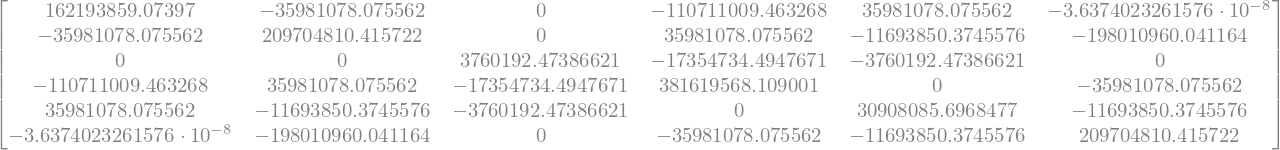

Matrix([[16.2193859073970, -3.59810780755620, 0, -11.0711009463268, 3.59810780755620, -3.63740232615760e-15], [-3.59810780755620, 20.9704810415722, 0, 3.59810780755620, -1.16938503745576, -19.8010960041164], [0, 0, 0.376019247386621, -1.73547344947671, -0.376019247386621, 0], [-11.0711009463268, 3.59810780755620, -1.73547344947671, 38.1619568109001, 0, -3.59810780755620], [3.59810780755620, -1.16938503745576, -0.376019247386621, 0, 3.09080856968477, -1.16938503745576], [-3.63740232615760e-15, -19.8010960041164, 0, -3.59810780755620, -1.16938503745576, 20.9704810415722]])
F_kond=


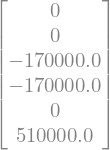

U_kond=


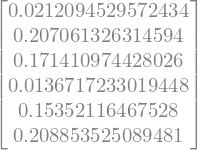

u_1= 21.2094529572434 mm
v_1= 207.061326314594 mm
v_2= 171.410974428026 mm
u_3= 13.6717233019448 mm
v_3= 153.521164675280 mm
v_4= 208.853525089481 mm


In [43]:
#Kondenzalt mennyisegek meghatarozasa

#Kondenzalt merevsegi matrix

K_kond=sp.Matrix([[K_g11,K_g12,K_g14,K_g15,K_g16,K_g18],
[K_g21,K_g22,K_g24,K_g25,K_g26,K_g28],
[K_g41,K_g42,K_g44,K_g45,K_g46,K_g48],
[K_g51,K_g52,K_g54,K_g55,K_g56,K_g58],
[K_g61,K_g62,K_g64,K_g65,K_g66,K_g68],
[K_g81,K_g82,K_g84,K_g85,K_g86,K_g88]])

print("K_kond=")
display(K_kond)
print(K_kond/(10**7))

#Kondenzalt terhelesvektor

F_kond=sp.Matrix([[Fx_1],[Fy_1],[Fy_2],[Fx_3],[Fy_3],[Fy_4]])
print("F_kond=")
display(F_kond)

#Kondenzalt elmozdulasvektor

U_kond=sp.Matrix(np.matmul(sp.Inverse(K_kond),F_kond))

print("U_kond=")
display(U_kond)

#Elmozdulas komponensek meghatarozasa

u_1=U_kond[0]
v_1=U_kond[1]
v_2=U_kond[2]
u_3=U_kond[3]
v_3=U_kond[4]
v_4=U_kond[5]

print("u_1=",u_1*1000,"mm")
print("v_1=",v_1*1000,"mm")
print("v_2=",v_2*1000,"mm")
print("u_3=",u_3*1000,"mm")
print("v_3=",v_3*1000,"mm")
print("v_4=",v_4*1000,"mm")

Globális elmozdulásvektor:

U_glob=


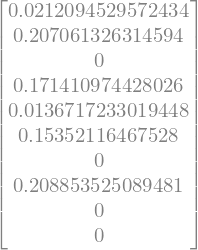


Globális terhelesvektor:

F_glob=


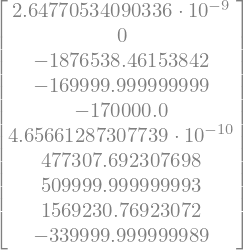


Fx_2= -1876.53846153842 kN
Fx_4= 477.307692307698 kN
Fx_5= 1569.23076923072 kN
Fy_5= -339.999999999989 kN


In [44]:
#Globalis elmozdulasvektor

print("Globális elmozdulásvektor:")

U=sp.Matrix([[u_1],[v_1],[u_2],[v_2],[u_3],[v_3],[u_4],[v_4],[u_5],[v_5]])

print("\nU_glob=")
display(U)

#Globalis terhelesvektor

print("\nGlobális terhelesvektor:")

F=sp.Matrix(np.matmul(K,U))

print("\nF_glob=")
display(F)

Fx_2=F[2]
print("\nFx_2=",Fx_2/1000,"kN")

Fx_4=F[6]
print("Fx_4=",Fx_4/1000,"kN")

Fx_5=F[8]
print("Fx_5=",Fx_5/1000,"kN")

Fy_5=F[9]
print("Fy_5=",Fy_5/1000,"kN")



In [45]:
#Alakvaltozasok

print("Alakváltozások:")

ε_1=((u_2-u_1)*np.cos(α_1)+(v_2-v_1)*np.sin(α_1))/L_1
print("\nε_1=",ε_1,"[-]")

ε_2=((u_3-u_1)*np.cos(α_2)+(v_3-v_1)*np.sin(α_2))/L_2
print("ε_2=",ε_2,"[-]")

ε_3=((u_2-u_3)*np.cos(α_3)+(v_2-v_3)*np.sin(α_3))/L_3 #
print("ε_3=",ε_3,"[-]")

ε_4=((u_4-u_1)*np.cos(α_4)+(v_4-v_1)*np.sin(α_4))/L_4
print("ε_4=",ε_4,"[-]")

ε_5=-((u_4-u_3)*np.cos(α_5)+(v_4-v_3)*np.sin(α_5))/L_5  #
print("ε_5=",ε_5,"[-]")

ε_6=((u_5-u_3)*np.cos(α_6)+(v_5-v_3)*np.sin(α_6))/L_6
print("ε_6=",ε_6,"[-]")

ε_7=((u_5-u_4)*np.cos(α_7)+(v_5-v_4)*np.sin(α_7))/L_7
print("ε_7=",ε_7,"[-]")

#Feszultsegek

print("\nNormálfeszültségek:")

σ_1=E*ε_1
print("\nσ_1=",σ_1*10**(-6),"[MPa]")

σ_2=E*ε_2
print("σ_2=",σ_2*10**(-6),"[MPa]")

σ_3=E*ε_3
print("σ_3=",σ_3*10**(-6),"[MPa]")

σ_4=E*ε_4
print("σ_4=",σ_4*10**(-6),"[MPa]")

σ_5=E*ε_5
print("σ_5=",σ_5*10**(-6),"[MPa]")

σ_6=E*ε_6
print("σ_6=",σ_6*10**(-6),"[MPa]")

σ_7=E*ε_7
print("σ_7=",σ_7*10**(-6),"[MPa]")

Alakváltozások:

ε_1= -0.00424189059144868 [-]
ε_2= 0.00446029299151083 [-]
ε_3= -0.00311878944723264 [-]
ε_4= -0.00137861444222084 [-]
ε_5= -0.00194970891245692 [-]
ε_6= 0.00623757889446511 [-]
ε_7= 0 [-]

Normálfeszültségek:

σ_1= -805.959212375249 [MPa]
σ_2= 847.455668387057 [MPa]
σ_3= -592.569994974202 [MPa]
σ_4= -261.936744021959 [MPa]
σ_5= -370.444693366815 [MPa]
σ_6= 1185.13998994837 [MPa]
σ_7= 0 [MPa]
